> # Tytuł: Analiza katastrofy Titanica

---

> <b>Autor: Adrian Stodolski

> <b>Przedmiot: Python

><b>Cel: Projekt zaliczeniowy

><b>Prowadzacy: Szymon Maćkowiak

><b>Rok: I

><b>Semestr: I

><b> Grupa: II

---

> # 1. Ustawienia 

---

In [1]:
# Biblioteki z których będziemy korzystać
from IPython.core.interactiveshell import InteractiveShell
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Jesli chcemy mieć kilka "outputów" z jednej komórki
InteractiveShell.ast_node_interactivity = "all"

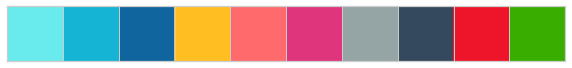

In [2]:
# Ustawienie ogólnego stylu dla plotów z biblioteki seaborn
sns.set(style="whitegrid", color_codes=True)
fav = ["#69EAEC", "#15B4D4", "#10659E", "#FFBE22", "#FF6A6C",
       "#DE357D", "#95a5a6", "#34495e", "#EE152A", "#39AD00"]
sns.palplot(sns.color_palette(fav))
sns.set_context("talk", font_scale=1.2, rc={"grid.linewidth": 0.8})

In [3]:
# Implementacja pliku "titanic.csv" w zmiennej "titanic" jako DataFrame
titanic = pd.read_csv(
    "/Users/adrianstodolski/Desktop/Titanic/titanic.csv", sep='\t')
# Dodanie kolumny "Family Size" która jest suma "SibSp" i "Parch"
titanic['FamilySize'] = titanic.SibSp + titanic.Parch + 1

---

> # 2. Optymalizacja 

---

In [4]:
# Sprawdzenie struktury - liczba kolumn oraz liczba wierszy
titanic.shape

(156, 13)

In [5]:
# Sprawdzenie, które dane są niekompletne
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
FamilySize       0
dtype: int64

In [6]:
# Sprawdzamy jaki ubytek w zestawieniu do całości stanowi "Age"
round(30/(len(titanic["PassengerId"])), 4)*100
# Sprawdzamy jaki ubytek w zestawieniu do całości stanowi "Cabin"
round(125/len(titanic["PassengerId"]), 4)*100
# Sprawdzamy jaki ubytek w zestawieniu do całości stanowi "Embarked"
round(1/len(titanic["PassengerId"]), 4)*100

19.23

80.13

0.64

---

> ## 2.1 Optymalizacja "Age"

In [7]:
# Ubytek w "Age" stanowi ~20% więc warto to naprawić
# Obliczamy medianę dla kolumny 'Age'
titanic["Age"].median(skipna=True)

26.0

In [8]:
# Zastępujemy "Nan'y" w kolumnie "Age" wyliczoną medianą
titanic["Age"].fillna(26, inplace=True)

---

> ## 2.2 Optymalizacja "Cabine"

In [9]:
# Brakuje ~80% rekordów, co oznacza, że przypisywanie informacji i wykorzystywanie tej zmiennej
# jest nierozsądne. Usuniemy tą zmienną z naszego DataFrame.
titanic.drop('Cabin', axis=1, inplace=True)

---

> ## 2.3 Optymalizacja "Embarked"

In [10]:
# Sprawdzamy dominante dla kolumny "Embarked"
titanic.loc[:, "Embarked"].mode()

0    S
dtype: object

In [11]:
# Najwięcej osób wchodzi na pokład w Southhampton więc zastąpimy Nan'a wartością "S"
titanic["Embarked"].fillna("S", inplace=True)

---

In [12]:
# Ponowne sprawdzenie kompletności danych (po optymalizacji)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

<i> Jak widzimy teraz nasze dane sa kompletne </i>

---

> # 3. Prezentacja danych

---

In [13]:
# Prezentacja naszego DataFrame
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,S,2
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,7
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,26.0,0,0,349215,7.8958,S,1
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,S,1
76,77,0,3,"Staneff, Mr. Ivan",male,26.0,0,0,349208,7.8958,S,1


---

> ## 3.1 Rozkład "przetrwania"

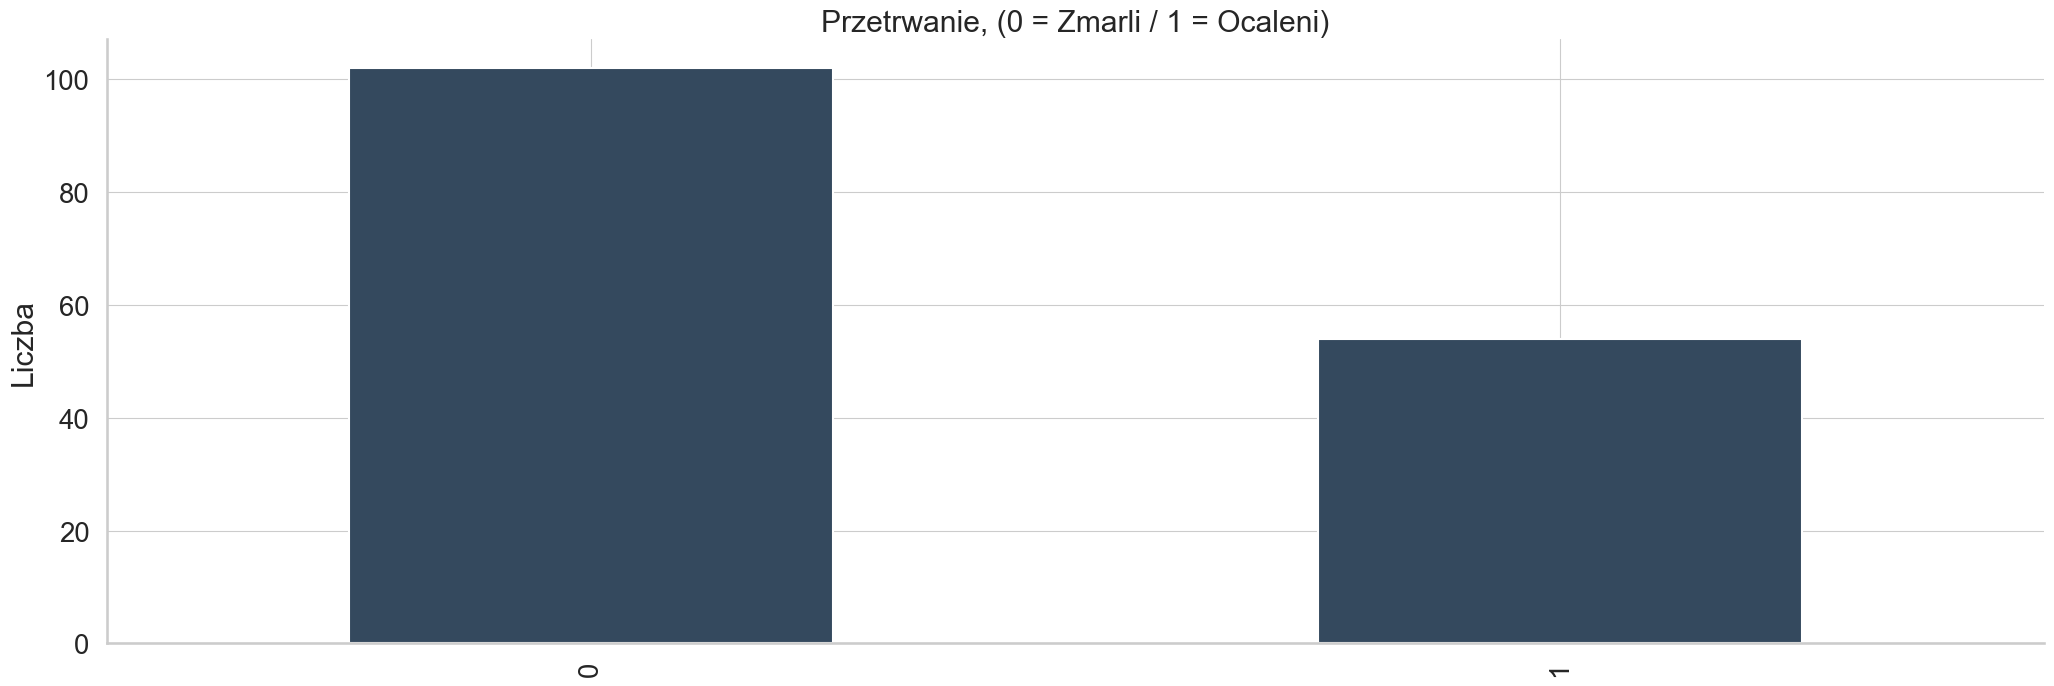

In [29]:
plt.figure(figsize=(25, 8), dpi=100)
titanic.Survived.value_counts().plot(kind='bar', color=fav[7], alpha=1)
plt.title("Przetrwanie, (0 = Zmarli / 1 = Ocaleni)")
plt.gca().set(ylabel='Liczba')
sns.despine()

---

> ## 3.2 Rozkład według wykupionej klas

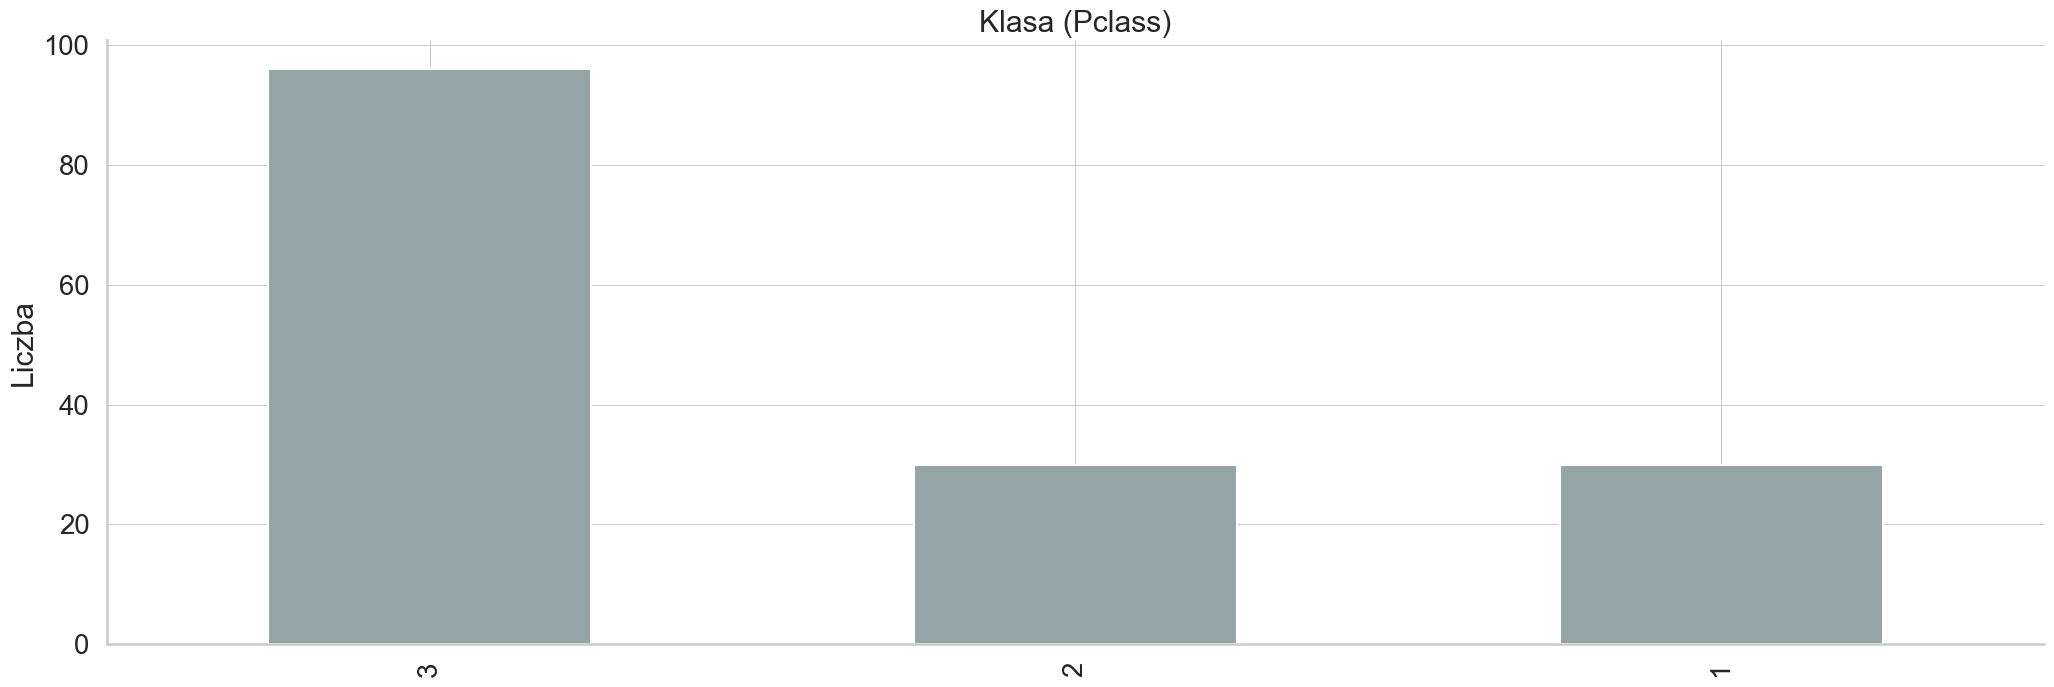

In [32]:
plt.figure(figsize=(25, 8), dpi=100)
titanic.Pclass.value_counts().plot(kind='bar', color=fav[-4], alpha=1)
plt.title("Klasa (Pclass)")
plt.gca().set(ylabel='Liczba')
sns.despine()

---

> ## 3.3 Rozkład wieku

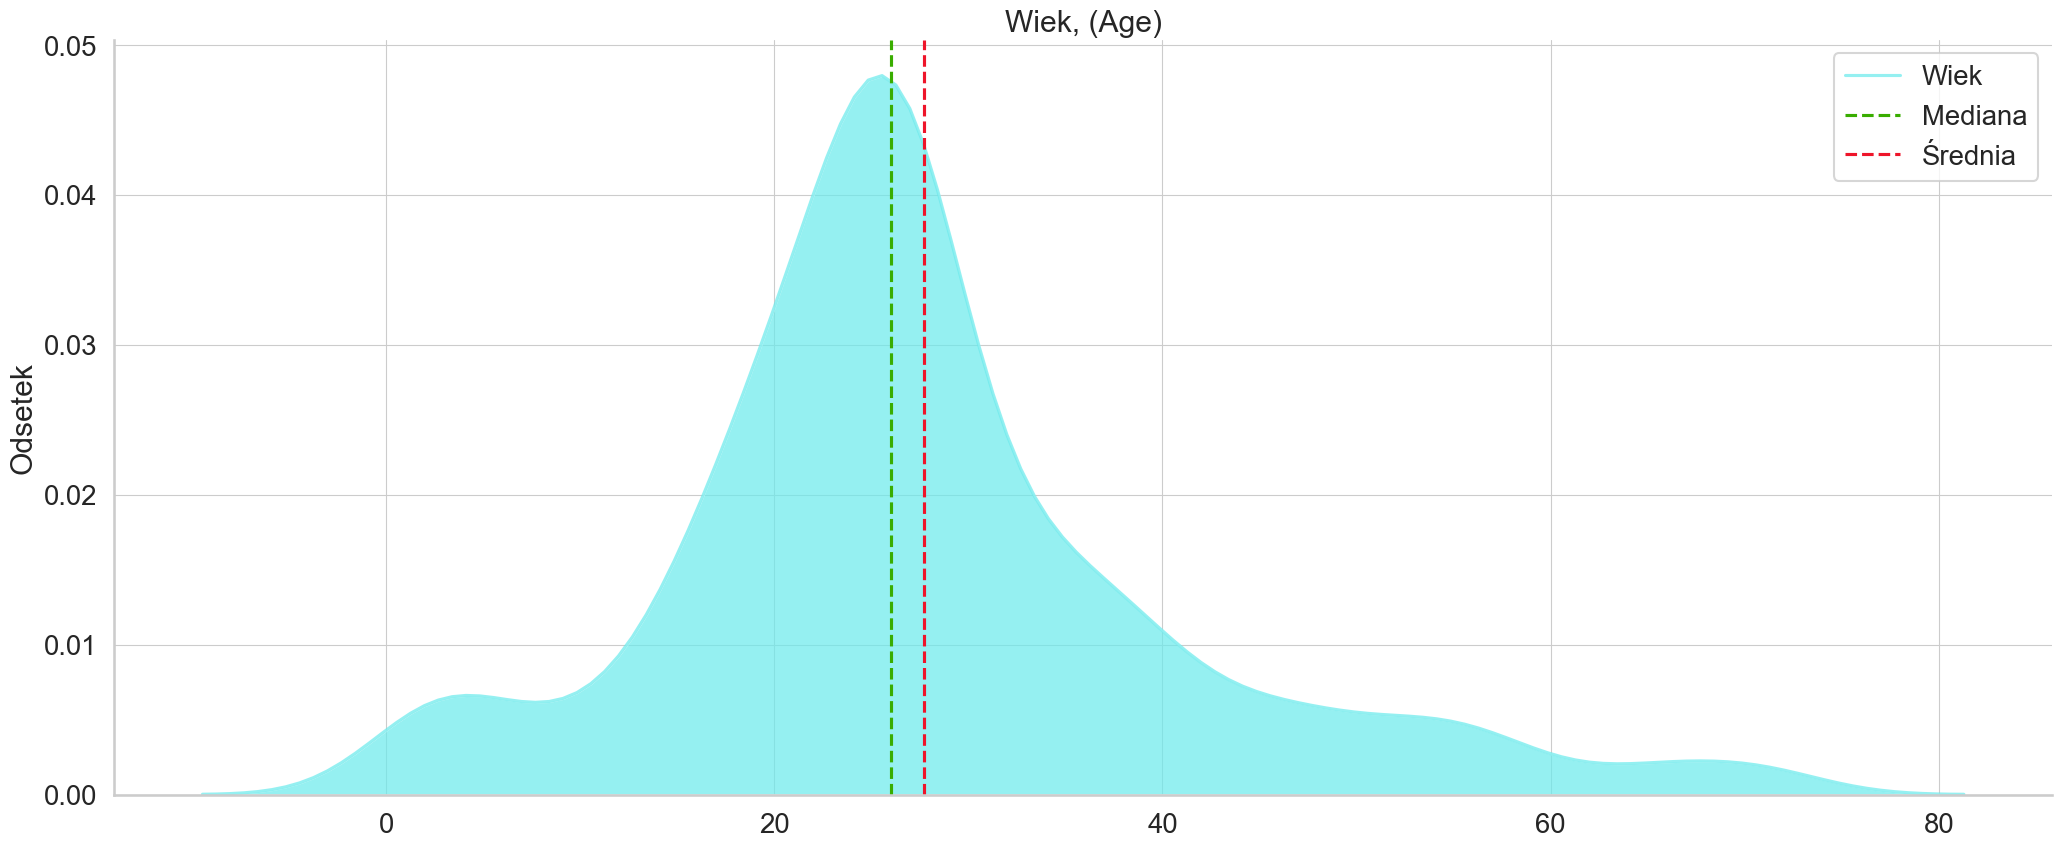

In [31]:
%matplotlib inline
plt.figure(figsize=(25, 10), dpi=100)
sns.kdeplot(titanic.Age, shade=True, alpha=0.7, color=fav[0], label='Wiek')
plt.axvline(titanic.Age.median(), color=fav[-1], label='Mediana', ls='dashed')
plt.axvline(titanic.Age.mean(), color=fav[-2], label='Średnia', ls='dashed')
plt.legend()
plt.title("Wiek, (Age)")
plt.gca().set(ylabel='Odsetek')
sns.despine()

---

> ## 3.4 Rozkład płci

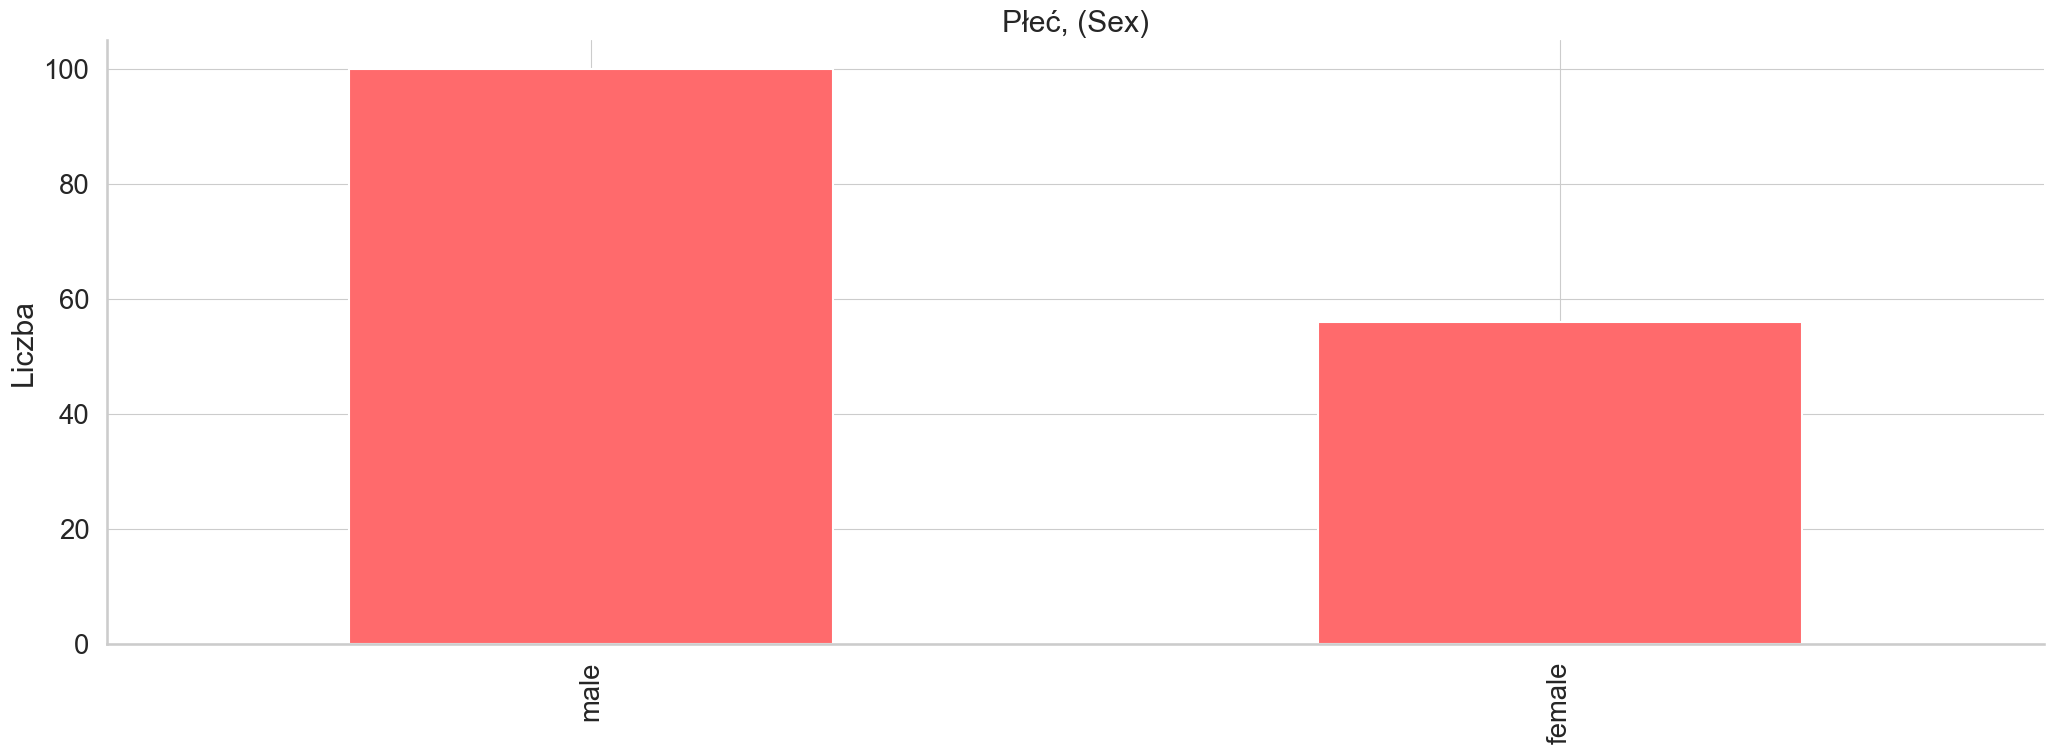

In [33]:
plt.figure(figsize=(25, 8), dpi=100)
titanic.Sex.value_counts().plot(kind='bar', color=fav[4], alpha=1)
plt.title("Płeć, (Sex)")
plt.gca().set(ylabel='Liczba')
sns.despine()

---

> ## 3.4 Rozkład według miejsca wypłynięcia

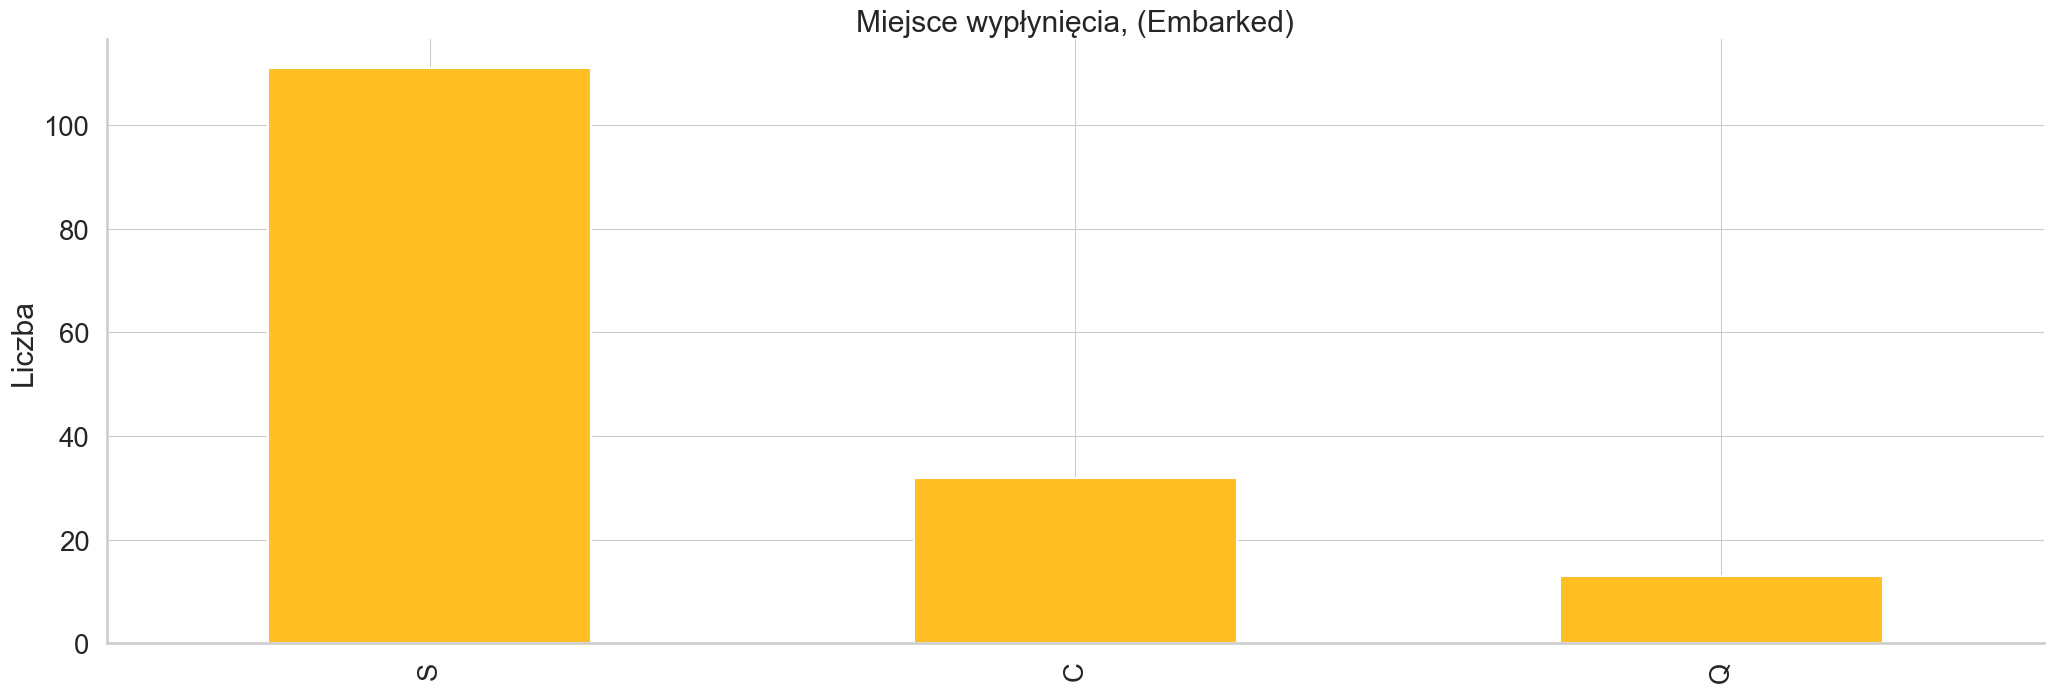

In [34]:
plt.figure(figsize=(25, 8), dpi=100)
titanic.Embarked.value_counts().plot(kind='bar', color=fav[3], alpha=1)
plt.title("Miejsce wypłynięcia, (Embarked)")
plt.gca().set(ylabel='Liczba')
sns.despine()

---

> ## 3.4 Rozkład cen biletów w oparciu o klase

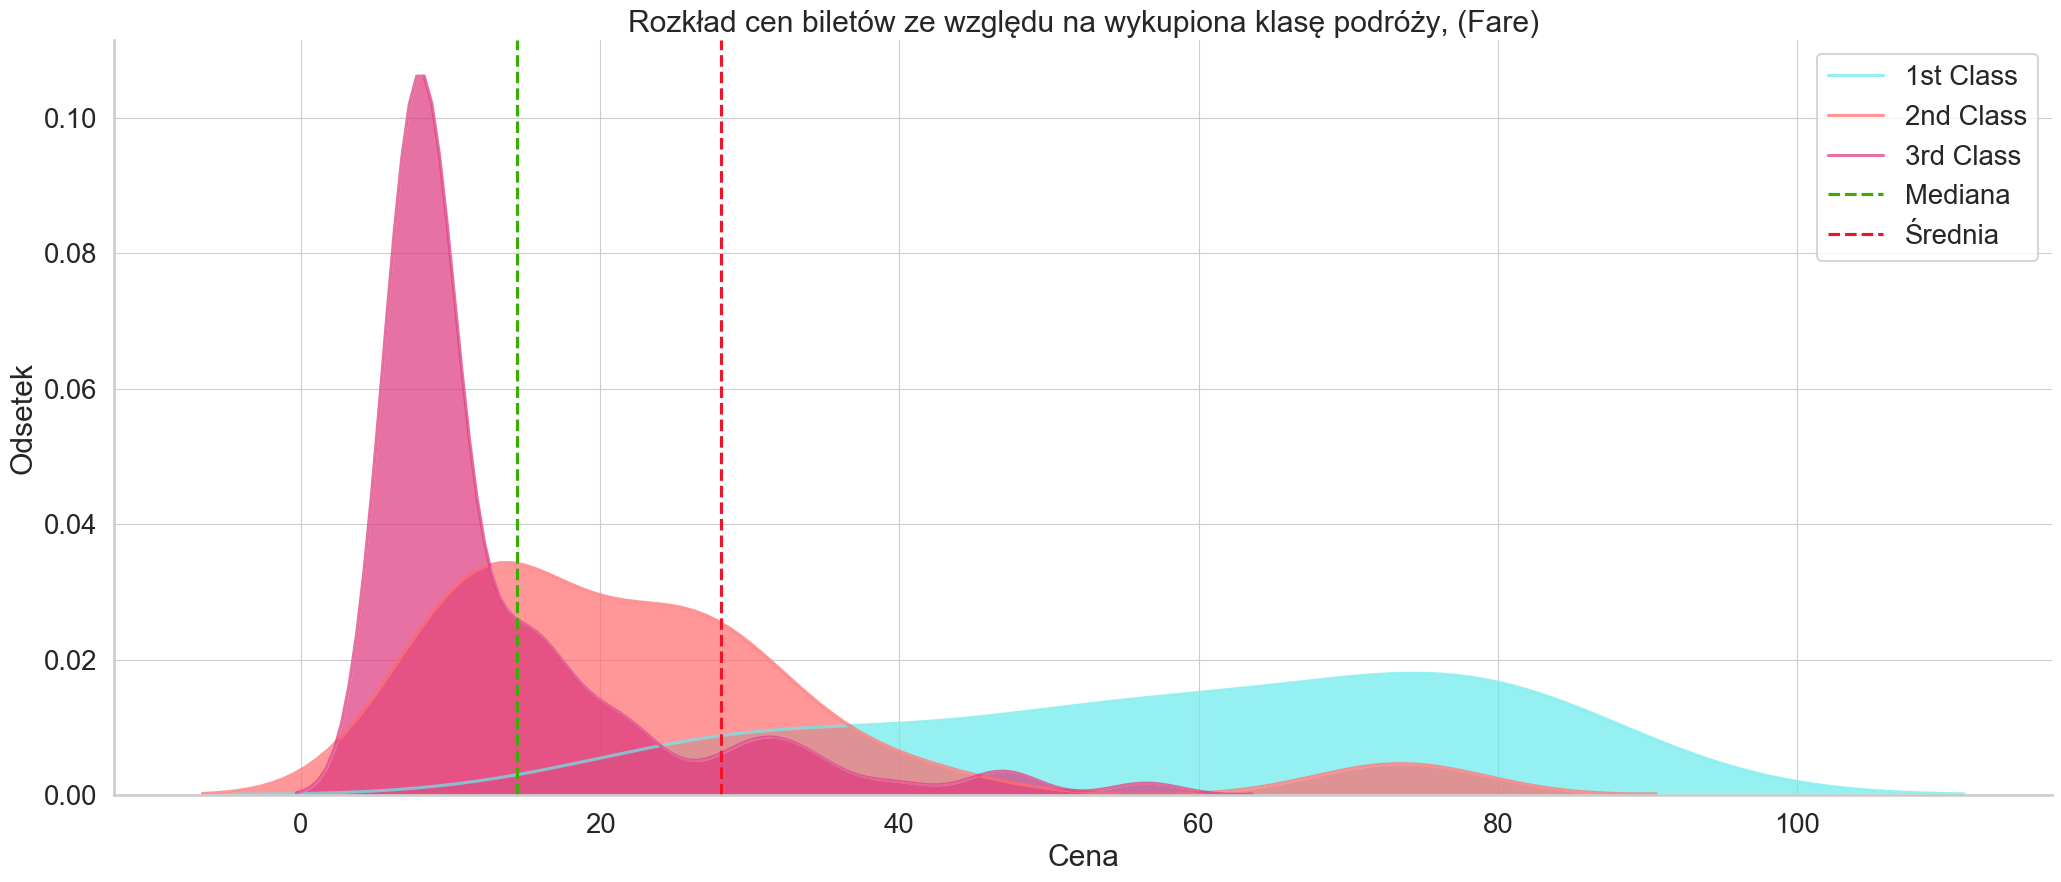

In [35]:
plt.figure(figsize=(25, 10), dpi=100)
sns.kdeplot(titanic.Fare[titanic.Pclass == 1].apply(
    lambda x: 80 if x > 80 else x), shade=True, alpha=0.7, color=fav[0], label='1st Class')
sns.kdeplot(titanic.Fare[titanic.Pclass == 2].apply(
    lambda x: 80 if x > 80 else x), shade=True, alpha=0.7, color=fav[4], label='2nd Class')
sns.kdeplot(titanic.Fare[titanic.Pclass == 3].apply(
    lambda x: 80 if x > 80 else x), shade=True, alpha=0.7, color=fav[5], label='3rd Class')
plt.axvline(titanic.Fare.median(), color=fav[-1], label='Mediana', ls='dashed')
plt.axvline(titanic.Fare.mean(), color=fav[-2], label='Średnia', ls='dashed')
plt.legend()
plt.title("Rozkład cen biletów ze względu na wykupiona klasę podróży, (Fare)")
plt.gca().set(xlabel='Cena', ylabel='Odsetek')
sns.despine()

---

> ## 3.5 Rozkład wieku ze względu na płeć

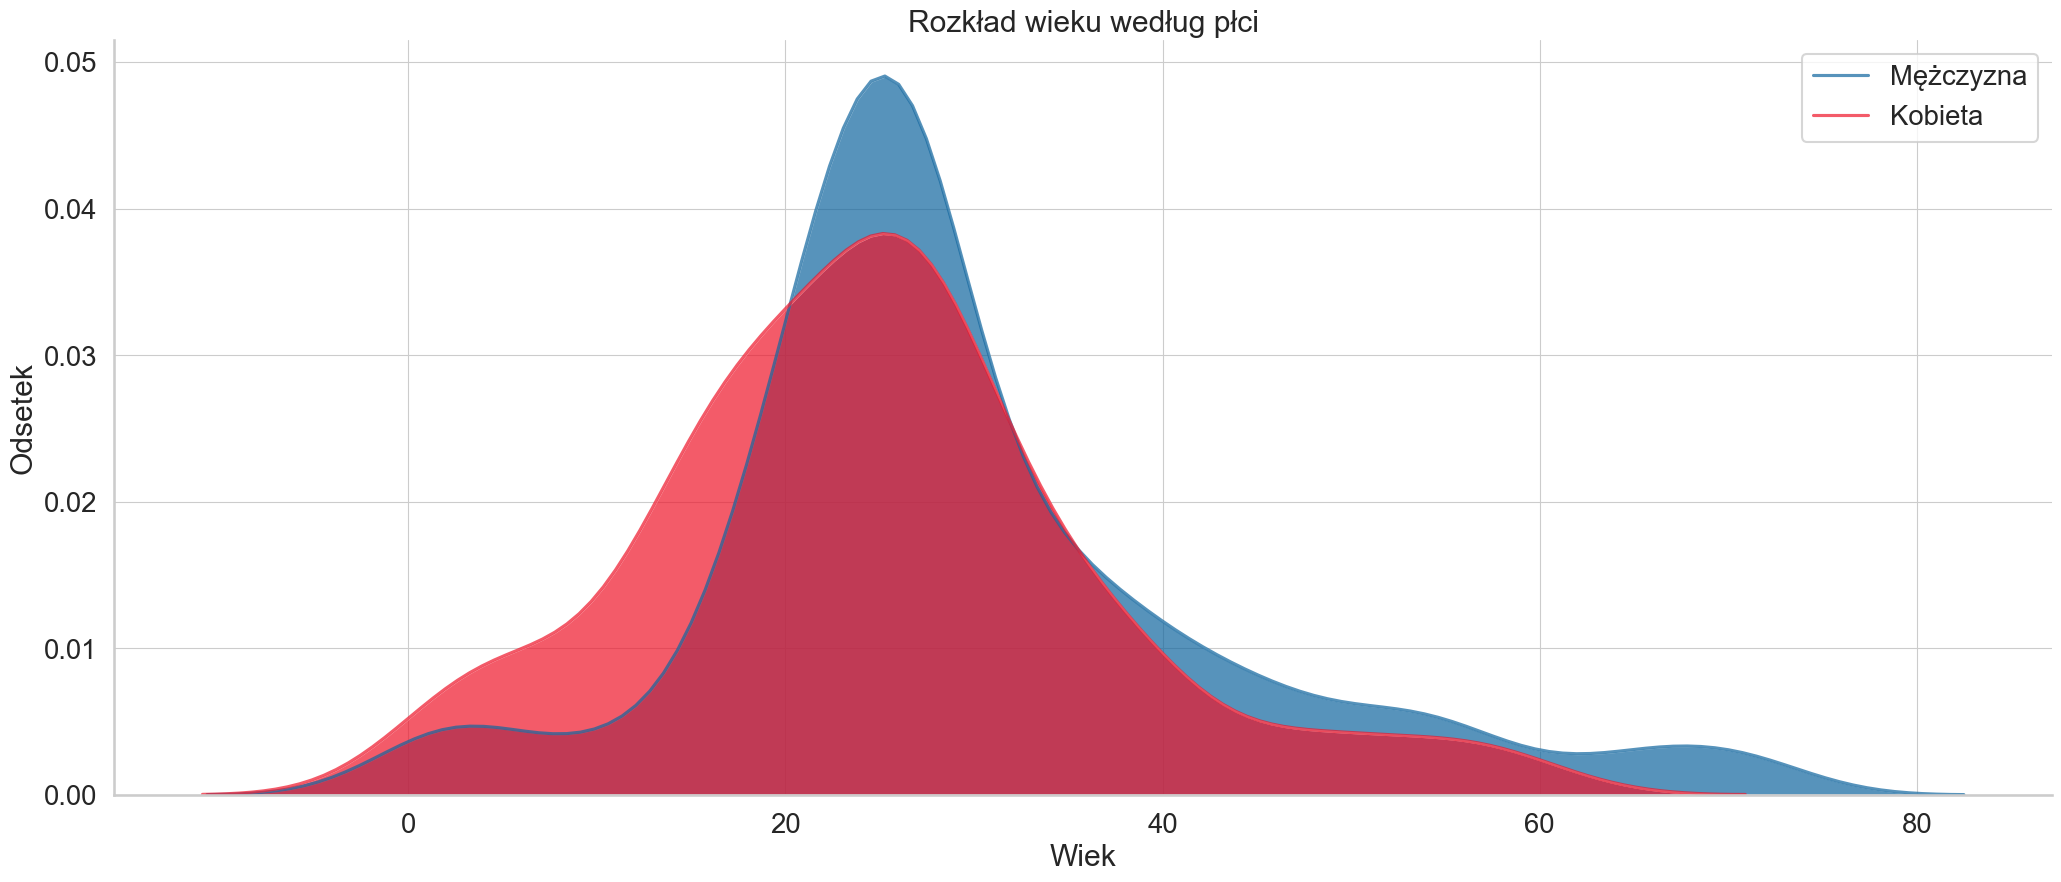

In [36]:
plt.figure(figsize=(25, 10), dpi=100)
sns.kdeplot(titanic.Age[titanic.Sex == 'male'], shade=True,
            color=fav[2], alpha=0.7, label='Mężczyzna')
sns.kdeplot(titanic.Age[titanic.Sex == 'female'],
            shade=True, color=fav[-2], alpha=0.7, label='Kobieta')
plt.legend()
plt.title("Rozkład wieku według płci")
plt.gca().set(xlabel='Wiek', ylabel='Odsetek')
sns.despine()

---

> ## 3.6 Rozkład "rodzinny"

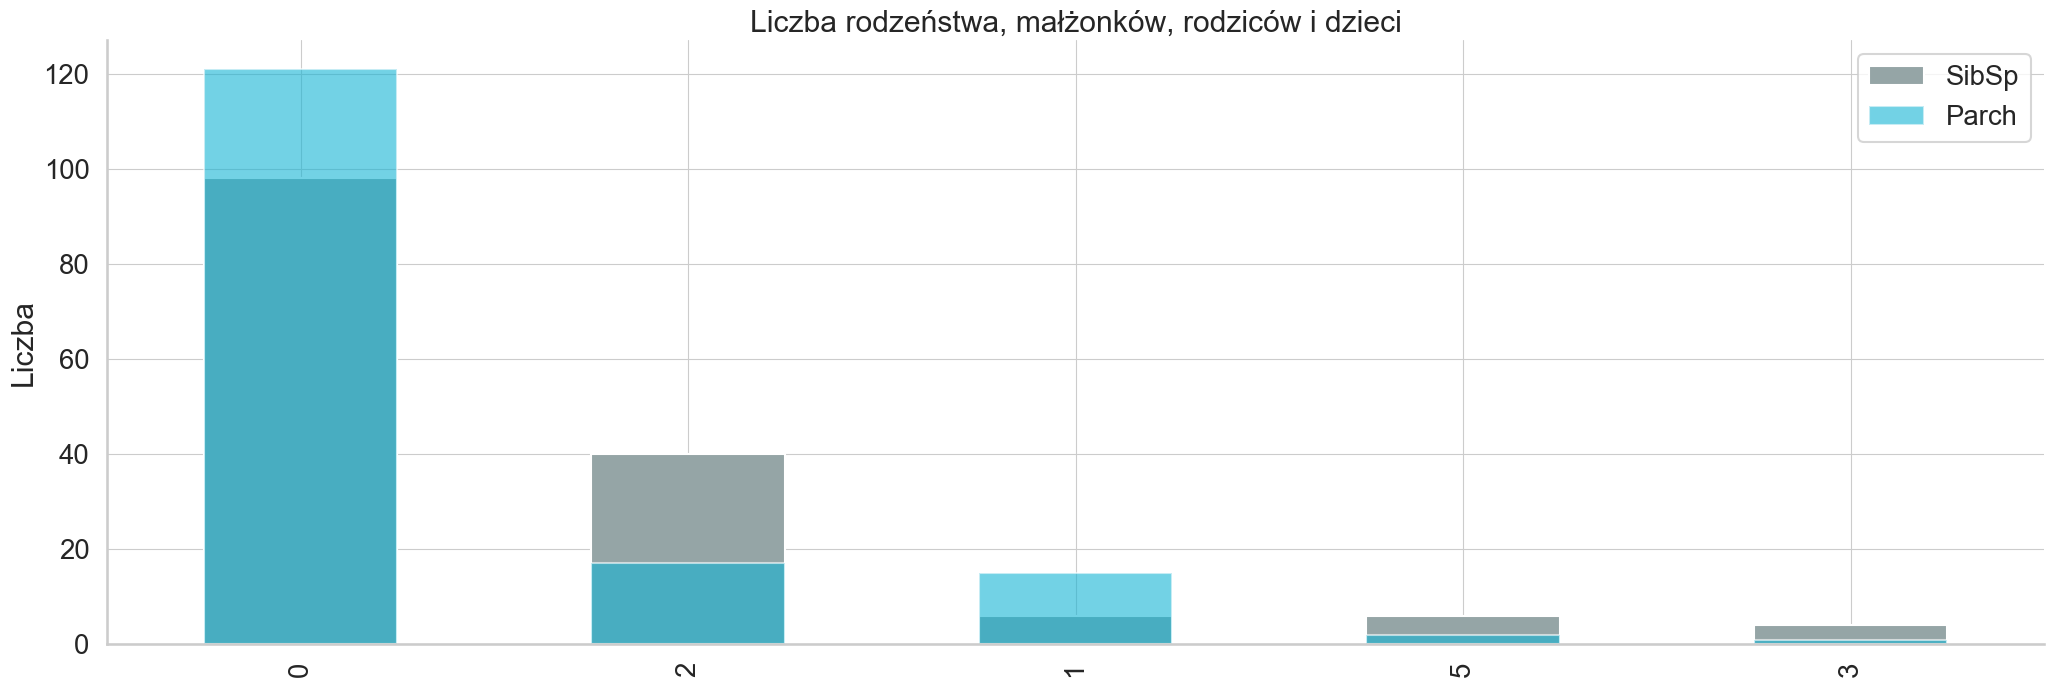

In [37]:
plt.figure(figsize=(25, 8), dpi=100)
titanic.SibSp.value_counts().plot(kind='bar', alpha=1, color=fav[6])
titanic.Parch.value_counts().plot(kind='bar', alpha=0.6, color=fav[1])
plt.legend()
plt.title("Liczba rodzeństwa, małżonków, rodziców i dzieci")
plt.gca().set(ylabel='Liczba')
sns.despine()

---

> ## 3.7 Wnioski

> <i>Kilka ciekawych informacji, które możemy szybko zobaczyć to fakt, że tylko 29% osób na pokładzie przeżyło katastrofę a 71% zmarło.

> <i>Widzimy również, że w 3 klasie było znacznie więcej ludzi niż w 2 klasie i w klasie 1. W większości przypadków jest to oczekiwane i standardowe.

> <i>Statystyki pokazują, że na pokładzie znajduje się więcej mężczyzn niż kobiet. Wśród ludzi do lat 18 więcej było kobiet niż mężczyzn a wśród ludzi starszych było więcej mężczyzn niż kobiet.

> <i>Kolumna Wiek pokazuje nam, że średni wiek pasażerów na pokładzie to ~27 lat, a maksymalny wiek to 80 lat.

> <i>Patrzac na Funkcja SibSp oraz Parch widzimy, że większość osób podróżowała samotnie. SibSp pokazuje nam, że średnio około 1 na 3 osoby miała na pokładzie albo małżonka albo rodzeństwo. Jednakże, Parch pokazuje, że około 1 na 5 osoby miała na pokładzie albo rodzica albo dziecko.

> <i>Z wykresu ceny biletu w relacji z klasa widzimy, że średnia cena biletu oscylowała w okolicach 30 dolarów a mediana oscyluje w okolicach 16 dolarów. Można również zauważyć, że ceny biletów są przechylone w zależności od klasy. W celu utrzymania przyzwoicie wyglądającej wizualizacji, ograniczyłem Taryfę do 80 dolarów. Można zauważyć, że większość biletów w klasie 1 stanowi bilety zaczynajce się od 35 dolarów do 90 dolarów a swój szczyt osiagaja w okolicach 75 dolarów . Więkoszość biltów w klasie 2 stanowia bilety w przedziale 17 - 28 dolara, posiadaja 2 szczyty w okolicach 15 dolarów i w okolicach 28 dolarów. Cena biletu dla klasy 3 osiaga swóh szczyt w okolicach ceny 7 dolarów i ze względu na to, że własnie ta klasa podróżuje najwięcej osób stanowi ona większość.

> <i>Patrzac na wykres miejsca wypłynięcia widzimy, że najwięcej osób wsiadło na pokład w porcie zlokalizowanym w Southampton



---

> # 4. Analiza danych - stopien przetrwania

---

<b> Sprawdzenie liczby ocalonych i liczby zgonów

In [22]:
titanic['Survived'].value_counts()

0    102
1     54
Name: Survived, dtype: int64

<i> Jak widzimy katastrofę przeżyły 54 osoby a 102 osoby niestety zmarły

---

> ## 4.1 Stopien przeżycia w zestawieniu z rodzajem klasy 

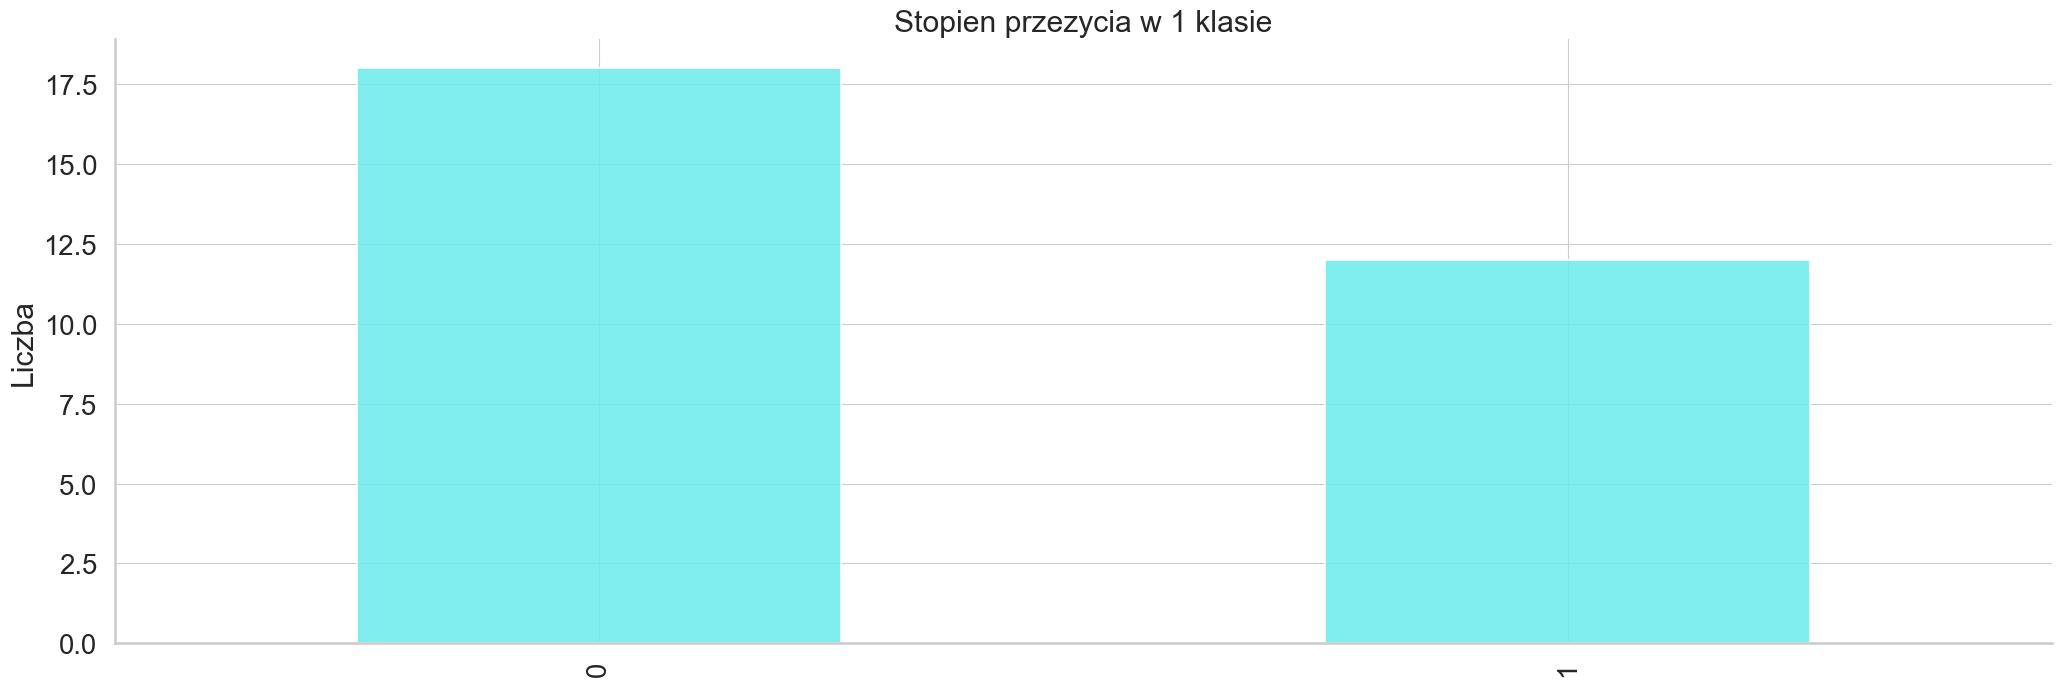

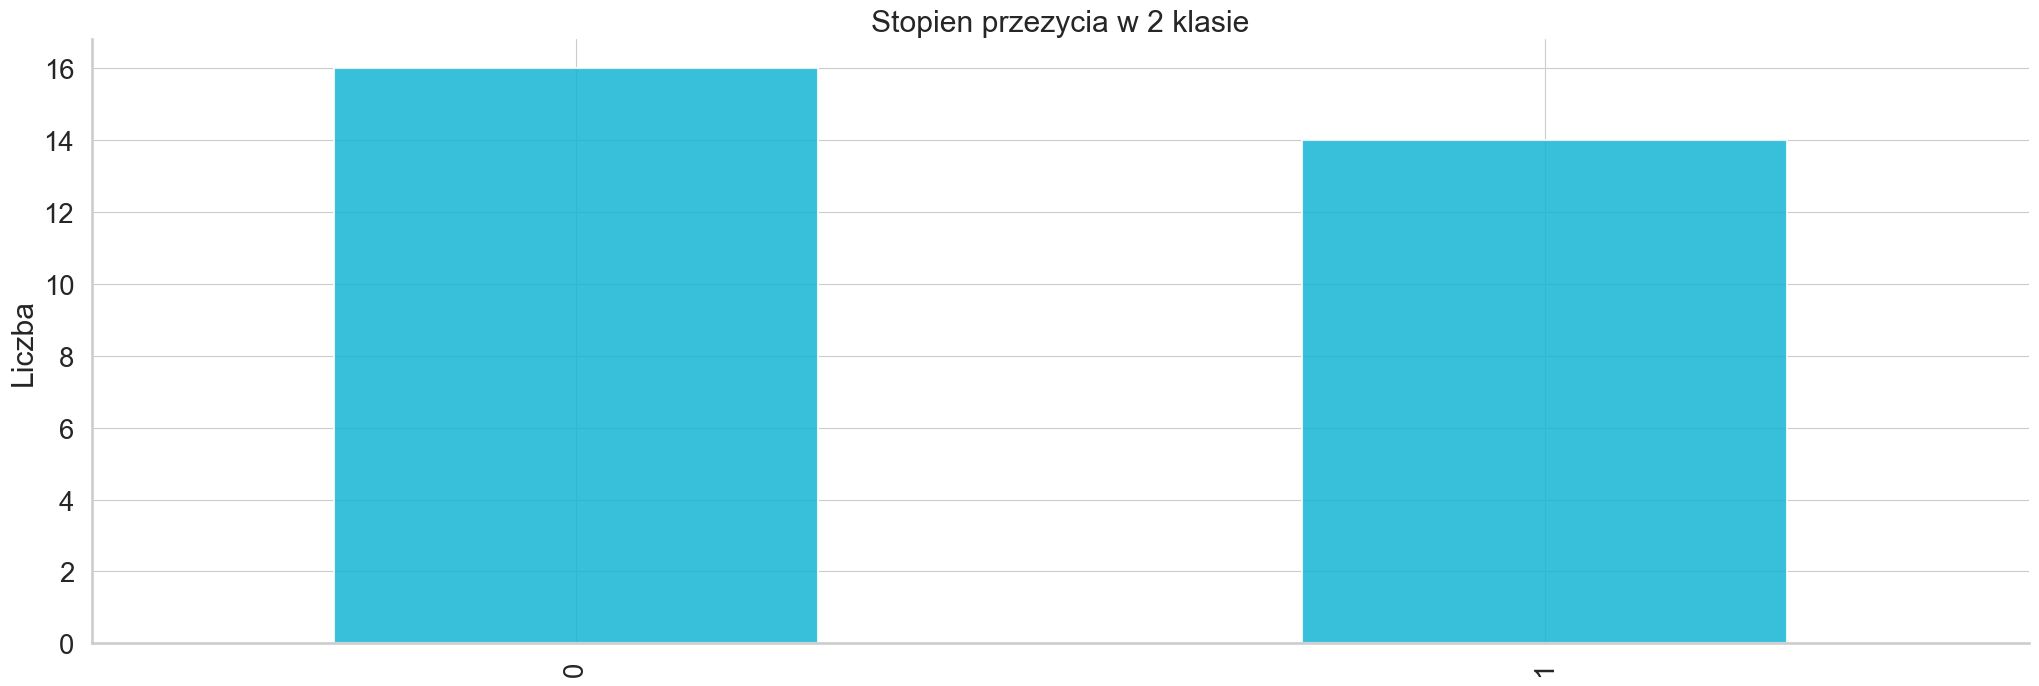

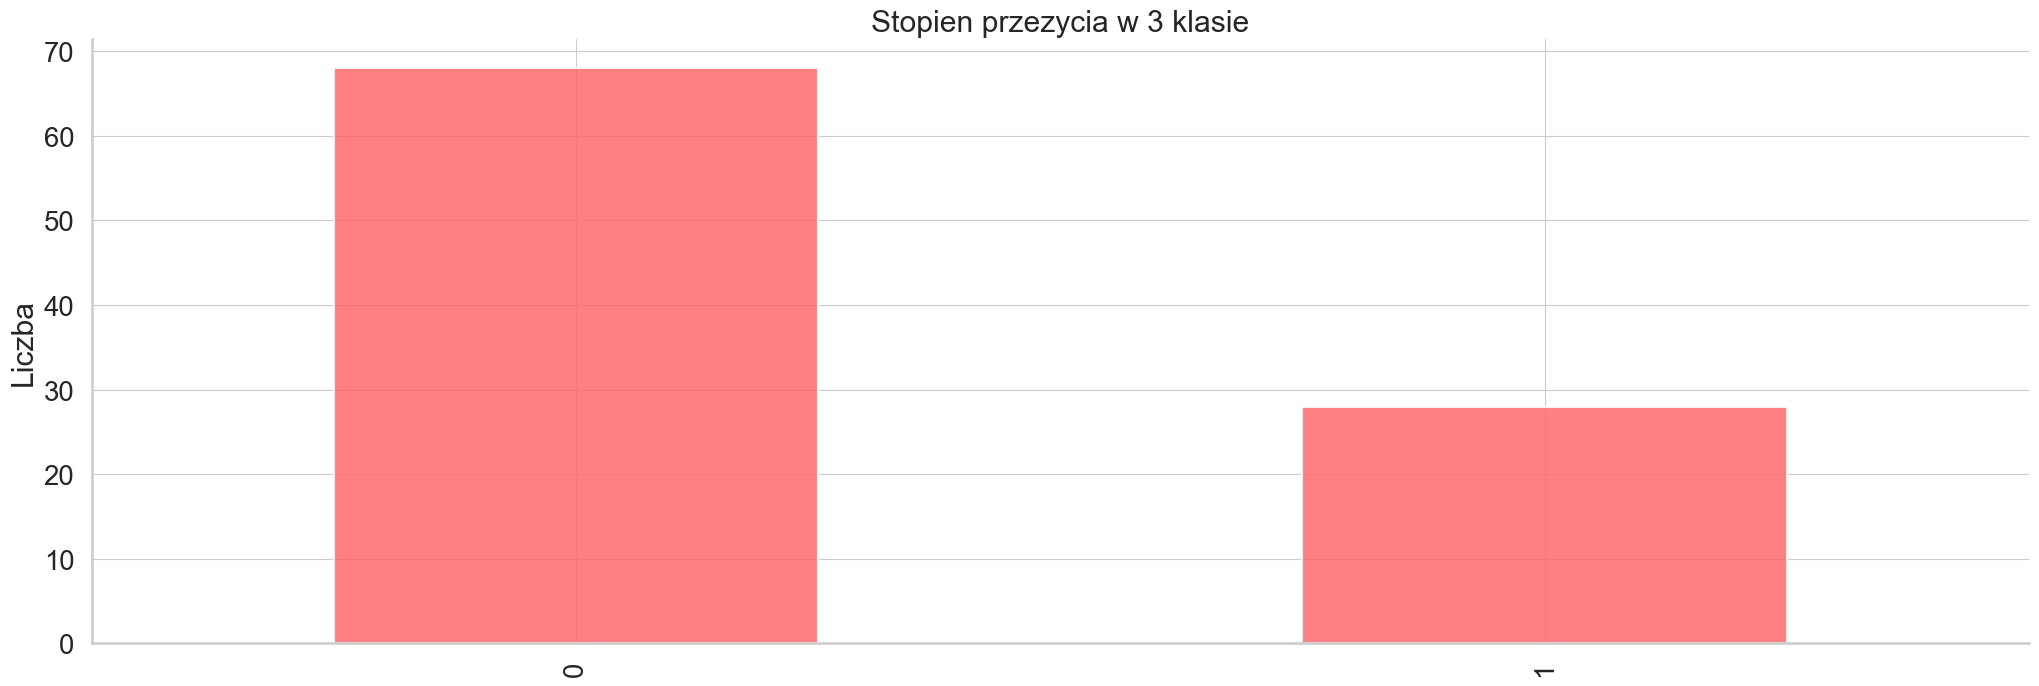

In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"
# 1 klasa
plt.figure(figsize=(25, 8), dpi=100)
titanic.Survived[titanic.Pclass == 1].value_counts().sort_index().plot(
    kind='bar', alpha=0.85, color=fav[0], label='1st Class')
plt.title("Stopien przezycia w 1 klasie")
plt.gca().set(ylabel='Liczba')
sns.despine()

# 2 klasa
plt.figure(figsize=(25, 8), dpi=100)
titanic.Survived[titanic.Pclass == 2].value_counts().sort_index().plot(
    kind='bar', alpha=0.85, color=fav[1], label='2nd Class')
plt.title("Stopien przezycia w 2 klasie")
plt.gca().set(ylabel='Liczba')
sns.despine()

# 3 klasa
plt.figure(figsize=(25, 8), dpi=100)
titanic.Survived[titanic.Pclass == 3].value_counts().sort_index().plot(
    kind='bar', alpha=0.85, color=fav[4], label='3rd Class')
plt.title("Stopien przezycia w 3 klasie")
plt.gca().set(ylabel='Liczba')
sns.despine()

---

> ## 4.2 Stopien przeżycia w zestawieniu z wiekiem

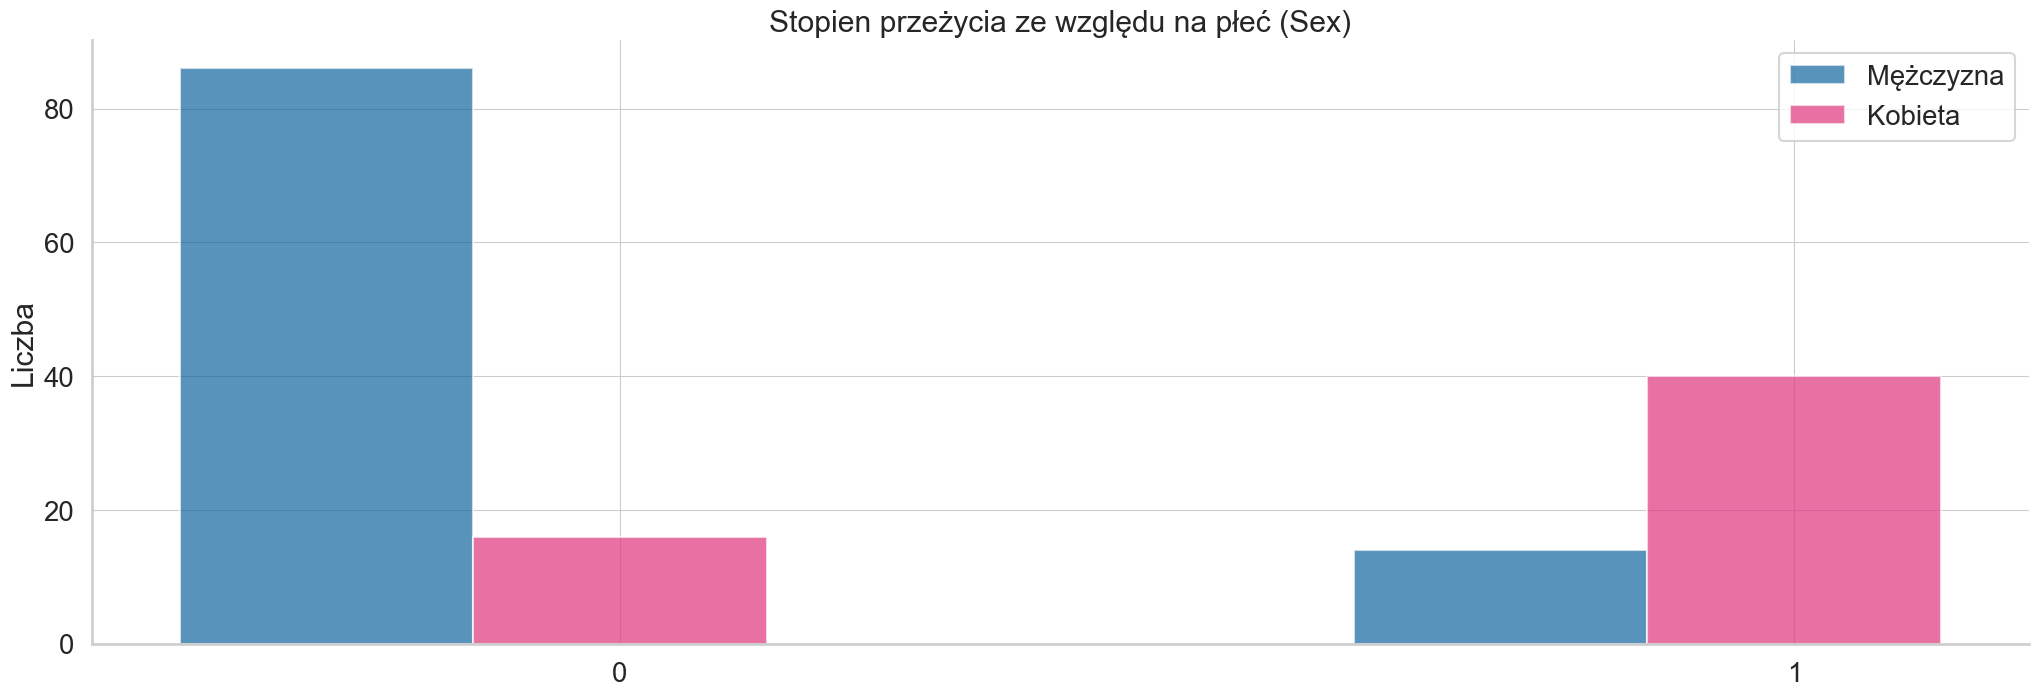

In [24]:
plt.figure(figsize=(25, 8), dpi=100)
plt.bar(np.array([0, 1])-0.25, titanic.Survived[titanic.Sex == 'male'].value_counts(
).sort_index(), width=0.25, color=fav[2], label='Mężczyzna', alpha=0.7)
plt.bar(np.array([0, 1]), titanic.Survived[titanic.Sex == 'female'].value_counts(
).sort_index(), width=0.25, color=fav[5], label='Kobieta', alpha=0.7)
plt.xticks(np.arange(0, 2, 1))
plt.legend()
plt.title("Stopien przeżycia ze względu na płeć (Sex)")
plt.gca().set(ylabel='Liczba')
sns.despine()

---

> ## 4.3 Stopien przeżycia ze względu na wiek

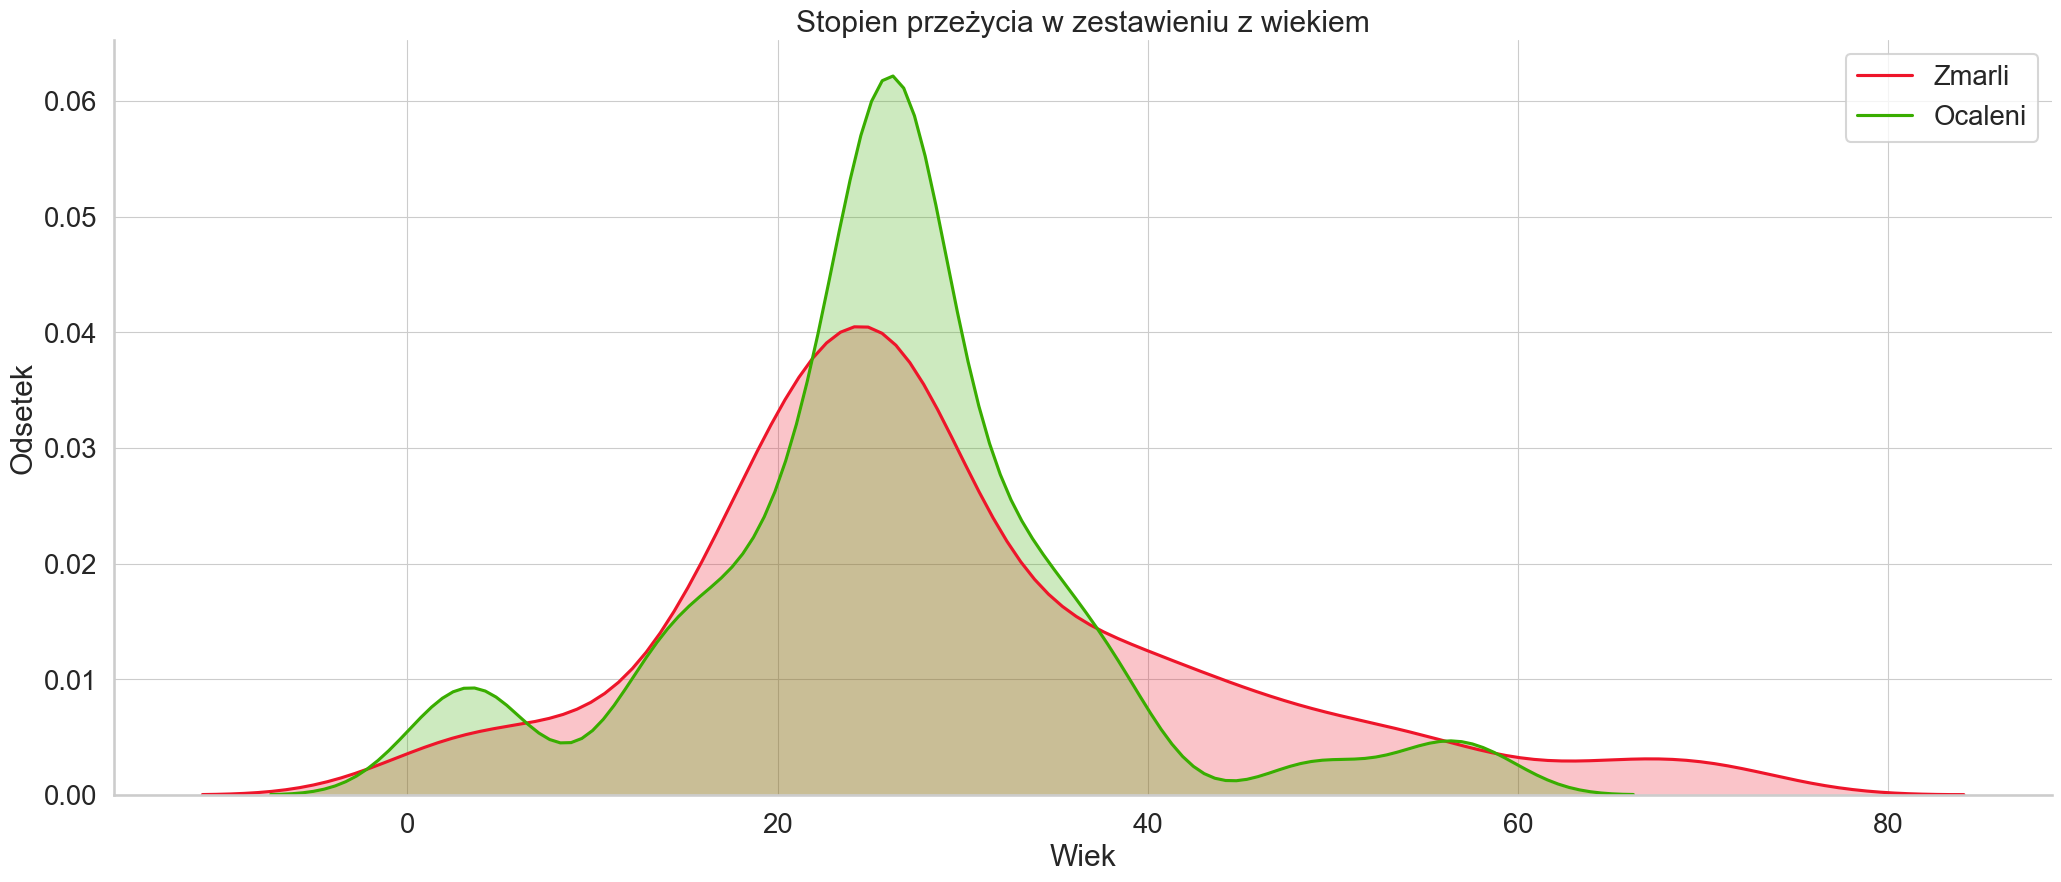

In [25]:
plt.figure(figsize=(25, 10), dpi=100)
sns.kdeplot(titanic.Age[titanic.Survived == 0],
            shade=True, color=fav[-2], label='Zmarli')
sns.kdeplot(titanic.Age[titanic.Survived == 1],
            shade=True, color=fav[-1], label='Ocaleni')
plt.legend()
plt.title("Stopien przeżycia w zestawieniu z wiekiem")
plt.gca().set(ylabel='Odsetek', xlabel='Wiek')
sns.despine()

---

> ## 4.4 Stopien przeżycia przy uwzględnieniu miejsca w którym znajdował się port

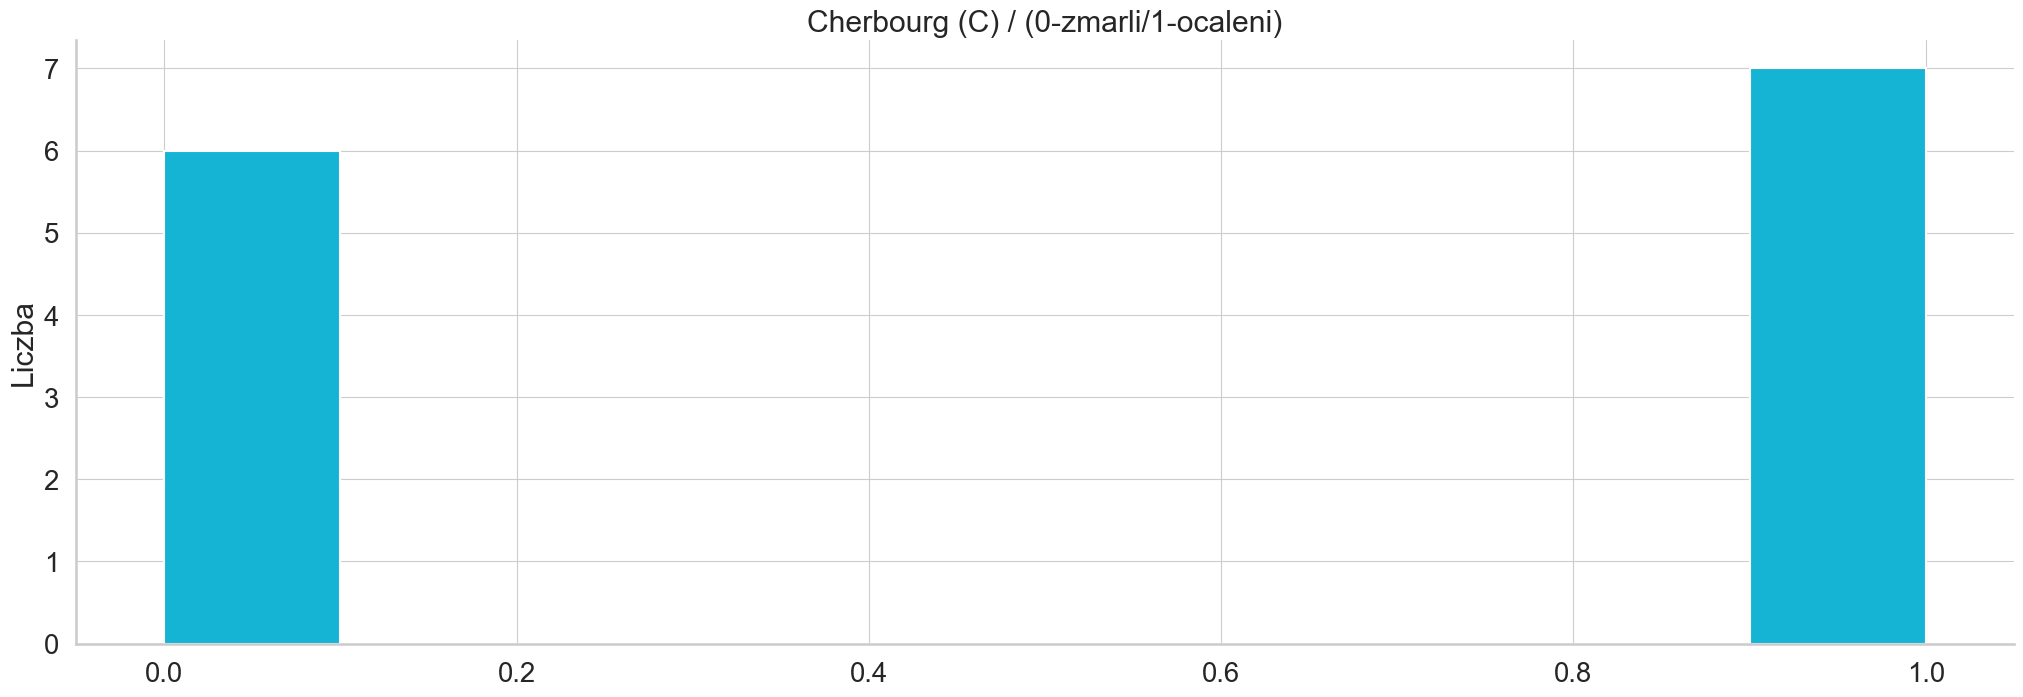

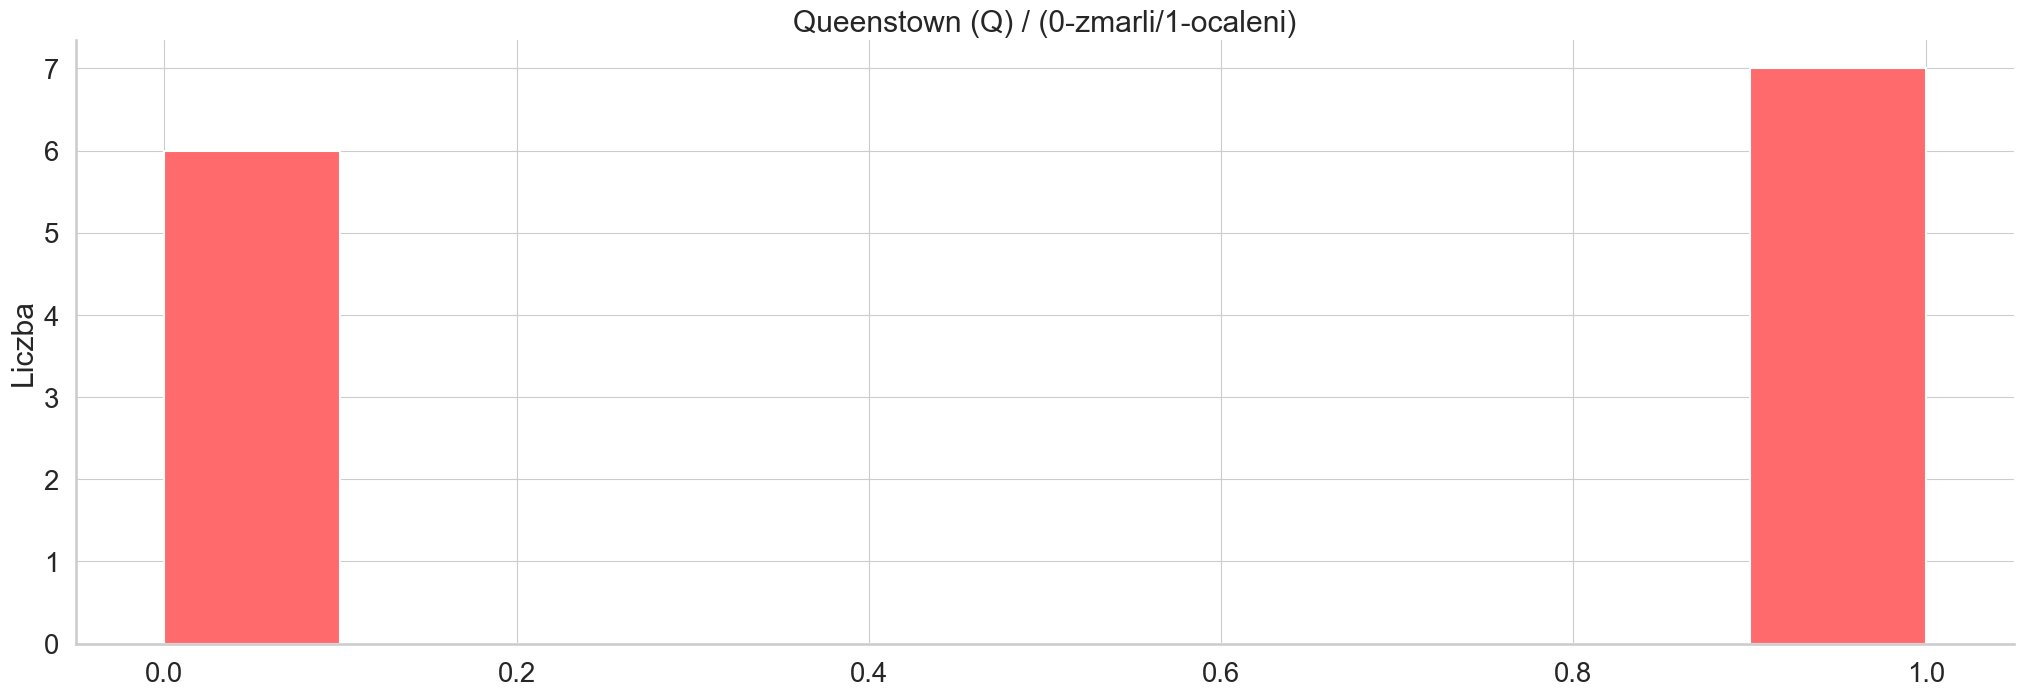

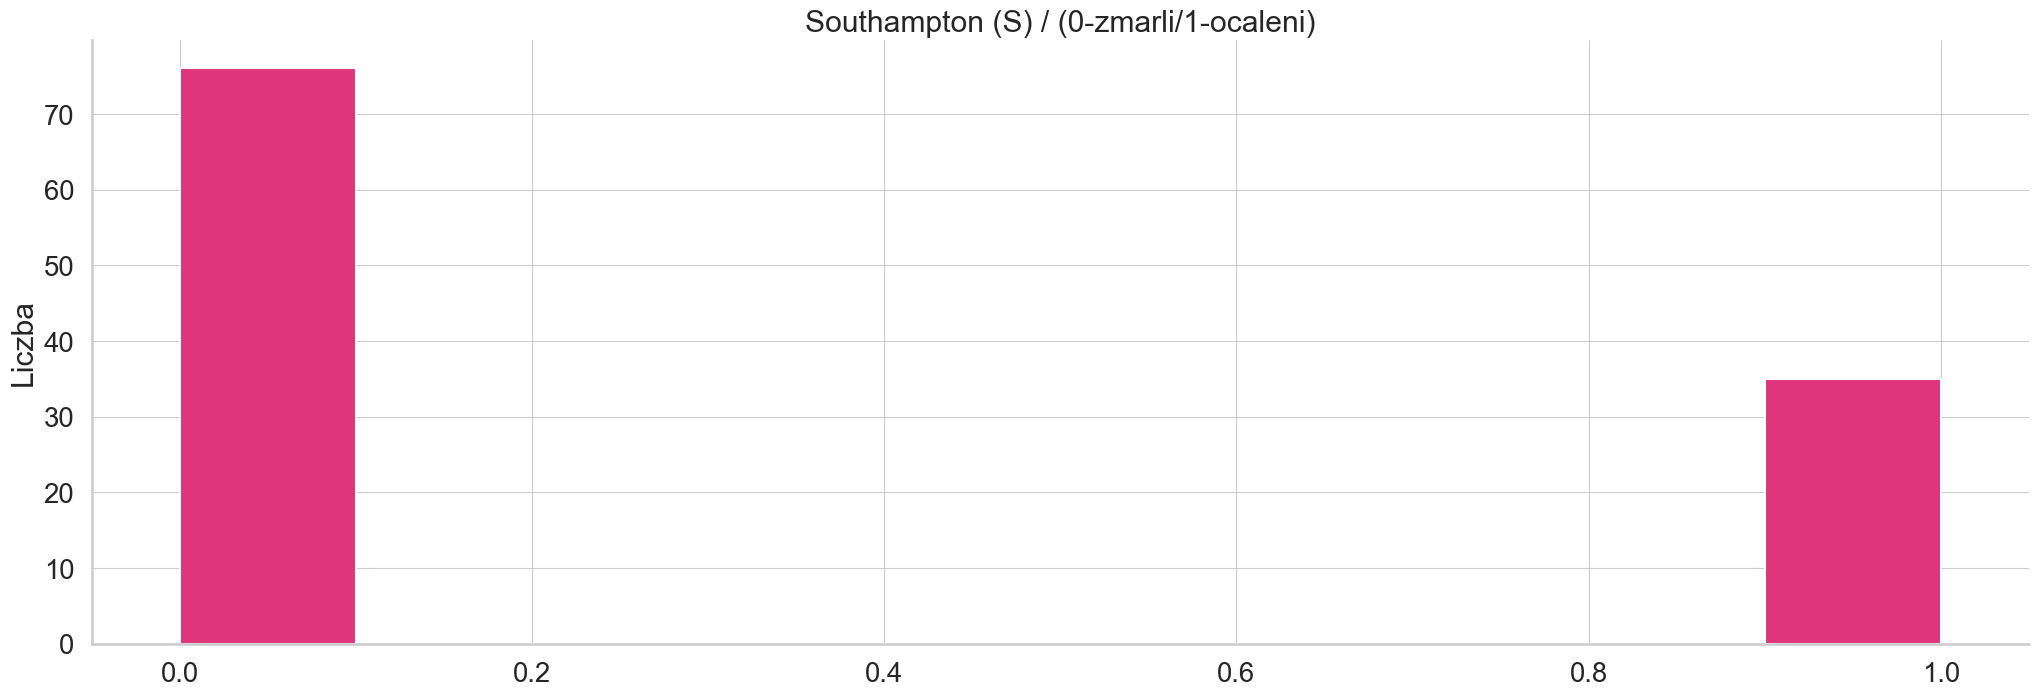

In [26]:
# Cherbourg
plt.figure(figsize=(25, 8), dpi=100)
plt.hist(titanic.Survived[pd.Categorical(
    titanic.Embarked).codes == 1], color=fav[1],)
plt.title("Cherbourg (C) / (0-zmarli/1-ocaleni)")
plt.gca().set(ylabel='Liczba')
sns.despine()

# Queenstown
plt.figure(figsize=(25, 8), dpi=100)
plt.hist(titanic.Survived[pd.Categorical(
    titanic.Embarked).codes == 1], color=fav[4],)
plt.title("Queenstown (Q) / (0-zmarli/1-ocaleni)")
plt.gca().set(ylabel='Liczba')
sns.despine()

# Southampton
plt.figure(figsize=(25, 8), dpi=100)
plt.hist(titanic.Survived[pd.Categorical(
    titanic.Embarked).codes == 2], color=fav[5],)
plt.title("Southampton (S) / (0-zmarli/1-ocaleni)")
plt.gca().set(ylabel='Liczba')
sns.despine()

---

> ## 4.5 Stopien przeżycia ze względu na wielkość rodziny

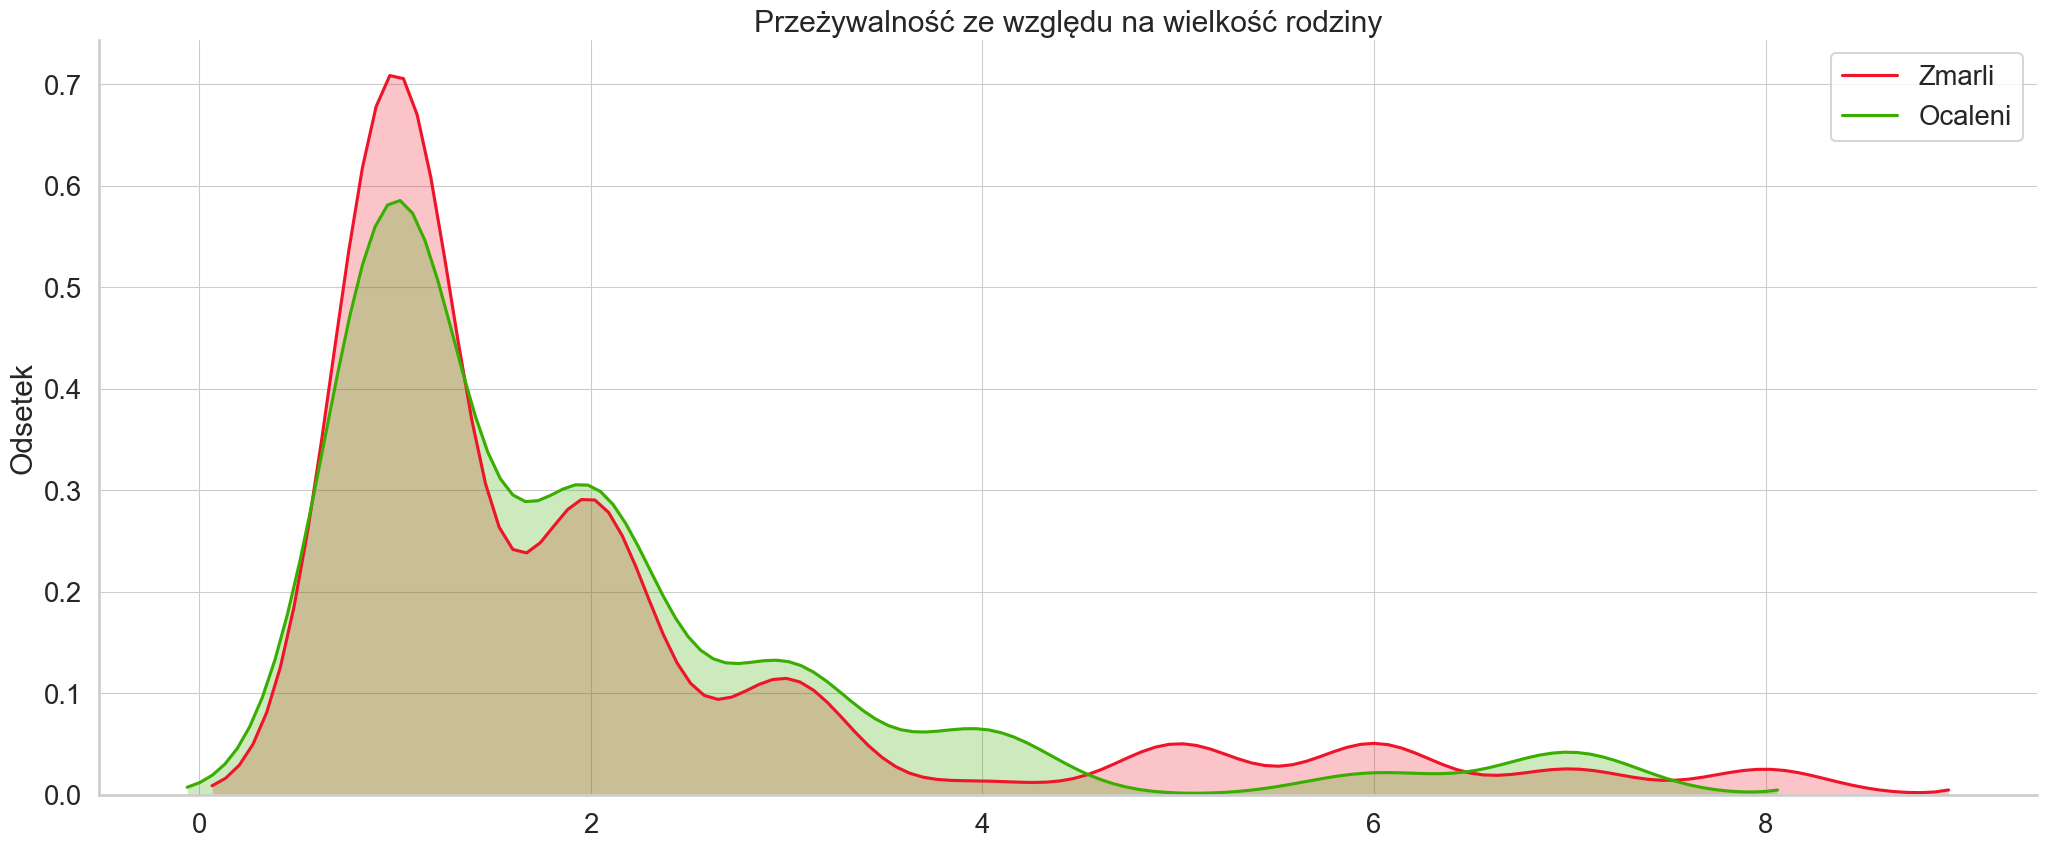

In [27]:
plt.figure(figsize=(25, 10), dpi=100)
sns.kdeplot(titanic.FamilySize[titanic.Survived == 0],
            shade=True, color=fav[-2], label='Zmarli')
sns.kdeplot(titanic.FamilySize[titanic.Survived == 1],
            shade=True, color=fav[-1], label='Ocaleni')
plt.title('Przeżywalność ze względu na wielkość rodziny')
plt.gca().set(ylabel='Odsetek')
sns.despine()
plt.legend()
plt.show()

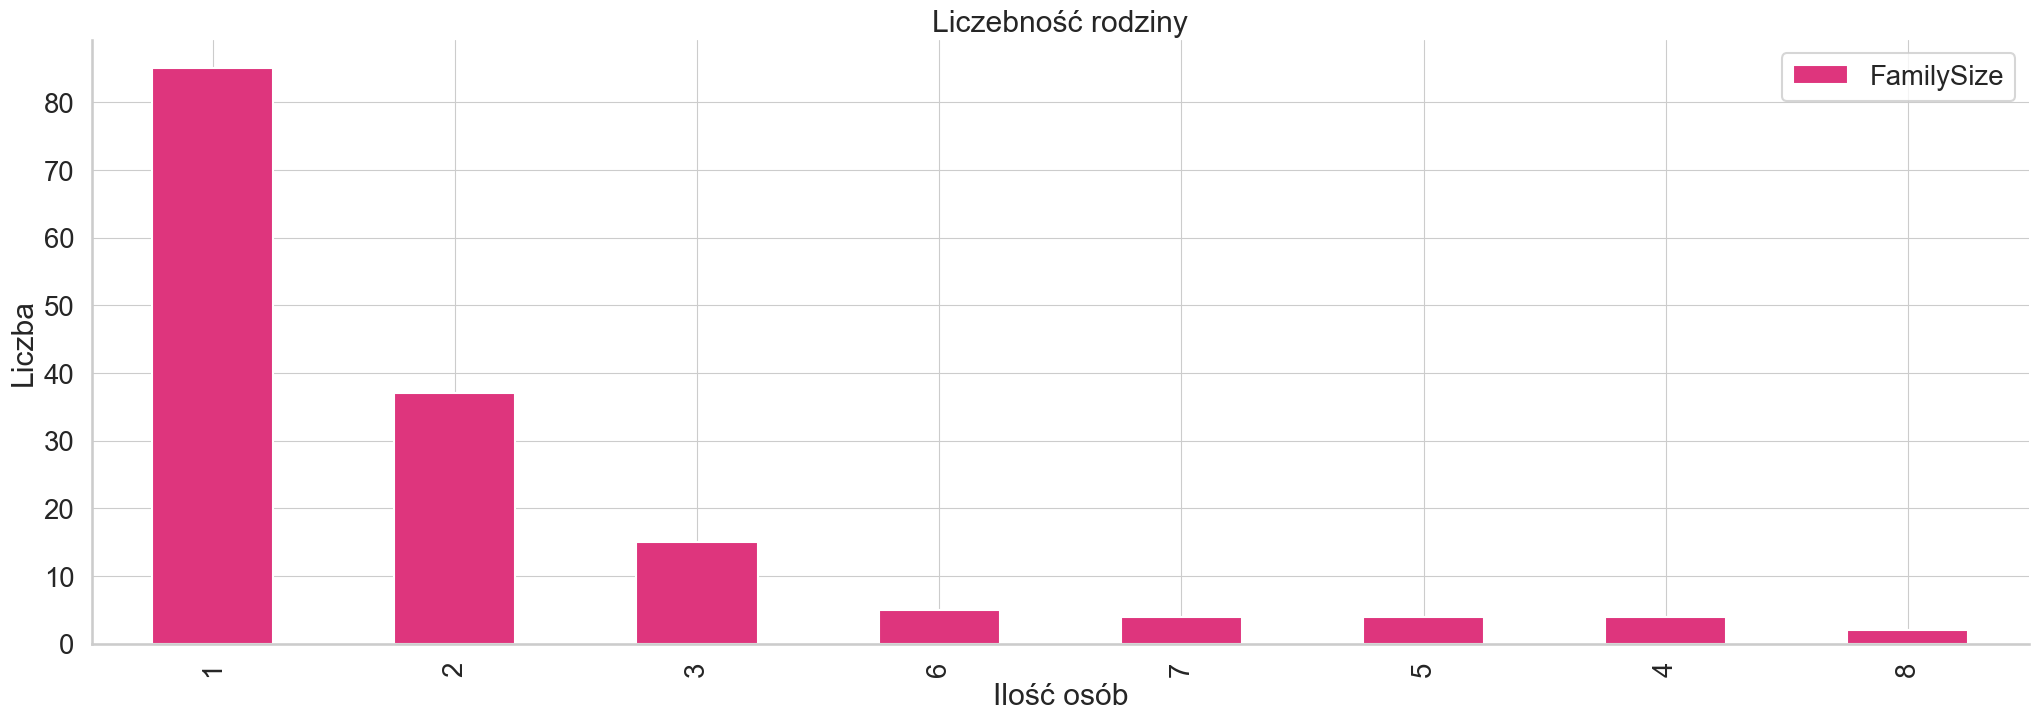

In [28]:
plt.figure(figsize=(25, 8), dpi=100)
titanic.FamilySize.value_counts().plot(kind='bar', alpha=1, color=fav[5])
plt.legend()
plt.title("Liczebność rodziny")
plt.gca().set(xlabel='Ilość osób', ylabel='Liczba')
sns.despine()

---

> ## 4.6 Wnioski

><i>Patrząc na klasy widzimy, że trzecia klasa ma najniższy wskaźnik przeżycia z drastyczną różnicą pomiędzy zgonami i przeżyciami. W klasie drugiej i pierwszej wskaźnik przeżycia był bardzo podobny. Druga klasa wydaje się mieć równomierny rozkład osób, które przeżyły i zginęły.
    
><i> Przetrwanie według płci pokazuje, że więcej pasażerów płci męskiej zginęło niż żeńskiej. To również pokazuje, że wskaźnik przeżycia wśród populacji kobiet jest wyższy niż wśród mężczyzn.

><i> Przetrwanie według wieku wskazuje, że wskaźnik przeżycia dzieci był wyższy. Ludzie pewnie starali się ratować najpierw najmłodsze dzieci, kiedy Titanic tonął. Istnieje również szczytowa liczba zgonów między 20 a 30 rokiem życia. Może to wynikać z prostego faktu, że średnia wieku ludności wynosi 27 lat. Szczytowy moment dla ocalonych oscyluje w okolicach średniej wieku, wynika to pewnie z faktu, że osoby te były sprawniejsze fizycznie i ratowały się same nie patrzac na innych.

><i> Patrząc na to, skąd pasażerowie wyruszyli w podróż, widzimy, że dla osób, które wyruszyły w podróż z portu w Cherbourgu i Queenstown, istnieje tylko niewielka przewaga przetrwania. Podczas gdy dla portu w Southampton przewaga liczby zgonów nad ocalałymi jest spora.
    
><i>Patrząc na statystyki dla wielkości rodziny można zauważyć że, osoby podróżujące samotnie częściej umierają niż osoby podróżujące w grupach, aż do momentu, gdy wielkość rodziny osiągnie 4+ członków. Może to wynikać z faktu, że ludzie w większych rodzinach spędzają więcej czasu na szukaniu członków rodziny i nie mają wystarczającej ilości czasu na ewakuację ze statku.

---

<b> Opracowano w styczniu 2020 r

---